In [8]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-non

In [9]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Datasets**

In [10]:
temp_df = pd.read_csv('/Users/luizeduardovedoato/DEV/CtoF/Celsius+to+Fahrenheit.csv')
temp_df.reset_index(drop=True, inplace=True)

In [11]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [12]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


**Visualize Dataset**

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

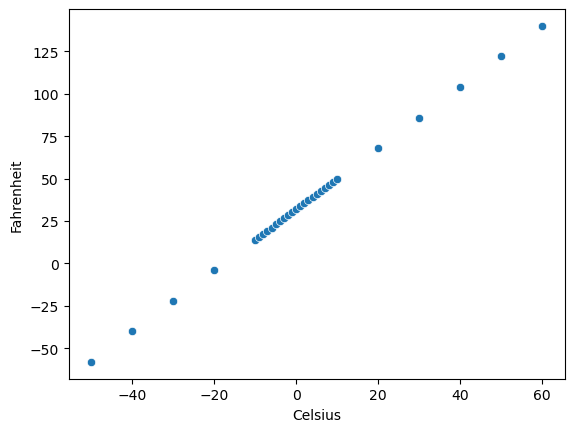

In [13]:
sns.scatterplot(x = temp_df['Celsius'],y = temp_df['Fahrenheit'])

**Create testing and training dataset**

In [14]:
X_train = temp_df['Celsius']
Y_train = temp_df['Fahrenheit']

**Build and trai the model**

In [15]:
X_train.shape

(30,)

In [16]:
Y_train.shape

(30,)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [20]:
epochs_hist = model.fit (X_train, Y_train, epochs = 200)

Epoch 1/200
1/1 [==============================] - 0s 218ms/step - loss: 1706.9768
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 1209.4142
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 971.6355
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 947.7033
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 1022.9189
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 1070.5295
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 1042.3947
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 958.4457
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 858.1952
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 775.0265
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 726.7278
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 712.8214
Epoch 13/200
1/1 [============

**Evaluat the model**

In [21]:
epochs_hist.history.keys()

dict_keys(['loss'])

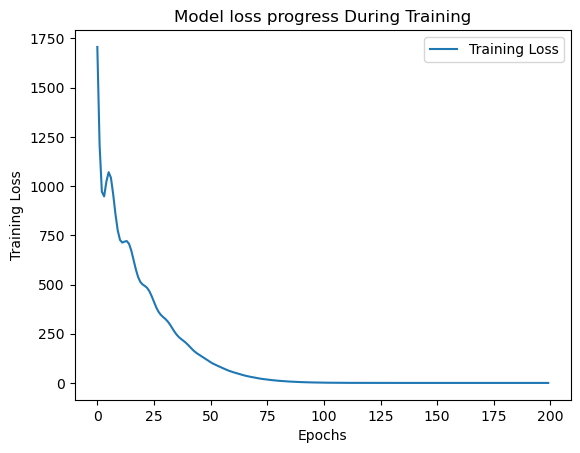

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [23]:
model.get_weights()

[array([[1.7999804]], dtype=float32), array([32.002644], dtype=float32)]

In [24]:
Temp_C = -12
Temp_F = model.predict([Temp_C])

print(Temp_F)

1/1 [==============================] - 0s 80ms/step
[[10.402878]]
